<a href="https://colab.research.google.com/github/erasadqadri/Banknote-Project/blob/main/ANN_Banknote.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**# ANN for Banknote Dataset**

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# Importing the dataset
dataset = pd.read_csv('/content/drive/MyDrive/Deep Learning/Datasets/Datasets/Banknote/BankNote.csv')
dataset.head()

,variance,skewness,curtosis,entropy,class
0,3.62160,8.6661,-2.8073,-0.44699,0
1,4.54590,8.1674,-2.4586,-1.46210,0
2,3.86600,-2.6383,1.9242,0.10645,0
3,3.45660,9.5228,-4.0112,-3.59440,0
4,0.32924,-4.4552,4.5718,-0.98880,0


In [3]:
#Independent Feature:
X = dataset.iloc[:,:-1]
X.head()

,variance,skewness,curtosis,entropy
0,3.62160,8.6661,-2.8073,-0.44699
1,4.54590,8.1674,-2.4586,-1.46210
2,3.86600,-2.6383,1.9242,0.10645
3,3.45660,9.5228,-4.0112,-3.59440
4,0.32924,-4.4552,4.5718,-0.98880


In [4]:
#Dependent Feature:
y = dataset.iloc[:,-1]
y

0       0
1       0
2       0
3       0
4       0
       ..
1367    1
1368    1
1369    1
1370    1
1371    1
Name: class, Length: 1372, dtype: int64

In [5]:
#Train Test Split:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [6]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [7]:
# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense

# Initialising the ANN
classifier = Sequential()

# Adding the input layer and the first hidden layer
classifier.add(Dense(activation="relu", input_dim=4, units=6, kernel_initializer="uniform"))

# Adding the second hidden layer
classifier.add(Dense(activation="relu", units=6, kernel_initializer="uniform"))

# Adding the output layer
classifier.add(Dense(activation="sigmoid", units=1, kernel_initializer="uniform"))

# Compiling the ANN
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

# Fitting the ANN to the Training set
history = classifier.fit(X_train, y_train, batch_size = 10, epochs = 70)

Epoch 1/70
96/96 [==============================] - 13s 2ms/step - loss: 0.6917 - accuracy: 0.5544
Epoch 2/70
96/96 [==============================] - 0s 3ms/step - loss: 0.6547 - accuracy: 0.9147
Epoch 3/70
96/96 [==============================] - 0s 2ms/step - loss: 0.4976 - accuracy: 0.9524
Epoch 4/70
96/96 [==============================] - 0s 3ms/step - loss: 0.3004 - accuracy: 0.9716
Epoch 5/70
96/96 [==============================] - 0s 2ms/step - loss: 0.1785 - accuracy: 0.9688
Epoch 6/70
96/96 [==============================] - 0s 2ms/step - loss: 0.1175 - accuracy: 0.9729
Epoch 7/70
96/96 [==============================] - 0s 2ms/step - loss: 0.0898 - accuracy: 0.9747
Epoch 8/70
96/96 [==============================] - 0s 2ms/step - loss: 0.0659 - accuracy: 0.9775
Epoch 9/70
96/96 [==============================] - 0s 2ms/step - loss: 0.0485 - accuracy: 0.9868
Epoch 10/70
96/96 [==============================] - 0s 3ms/step - loss: 0.0463 - accuracy: 0.9900
Epoch 11/70
96/96 

In [8]:
history.history??

In [9]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 30        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 79
Trainable params: 79
Non-trainable params: 0
_________________________________________________________________


In [10]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

In [11]:
# Making the Confusion Matrix
from sklearn.metrics import accuracy_score
accuracy=accuracy_score(y_test,y_pred)
accuracy

0.9878640776699029

In [12]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[227,   5],
       [  0, 180]])

In [13]:
from sklearn.metrics import f1_score
f1_score(y_test, y_pred)

0.9863013698630138

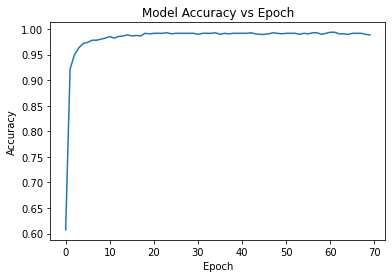

In [14]:
from matplotlib import pyplot as plt 

plt.plot(history.history['accuracy'])
plt.title('Model Accuracy vs Epoch')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()

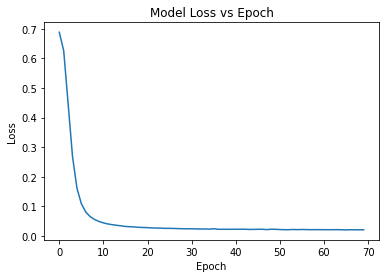

In [15]:
plt.plot(history.history['loss'])
plt.title('Model Loss vs Epoch')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()